In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.constraints import maxnorm
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread, imresize
import warnings; warnings.simplefilter('ignore')
from google.colab import files

In [0]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

In [0]:
num_classes = 10
epochs = 50
batch_size = 32
lrate = 0.001
decay = lrate/epochs

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])  
y_test = y_test.reshape(y_test.shape[0])

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'validation samples')

X_train shape: (50000, 32, 32, 3)
50000 training samples
10000 validation samples


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [0]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Convolution2D(24, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(24, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
# Compile model
Adm = Adam(lr=lrate, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=Adm, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 24)        672       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 24)        5208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 24)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3146240   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [11]:
DataGenerator = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, Y_test),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
39328/50000 [======================>.......] - ETA: 5s - loss: 1.5468 - acc: 0.4412

50000/50000 [==============================] - 25s 499us/step - loss: 1.4925 - acc: 0.4619 - val_loss: 1.2108 - val_acc: 0.5877
Epoch 2/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.1812 - acc: 0.5815 - val_loss: 1.1227 - val_acc: 0.6144
Epoch 3/50
 1504/50000 [..............................] - ETA: 22s - loss: 1.0302 - acc: 0.6416

50000/50000 [==============================] - 24s 479us/step - loss: 1.0633 - acc: 0.6256 - val_loss: 0.9855 - val_acc: 0.6548
Epoch 4/50
38336/50000 [======================>.......] - ETA: 5s - loss: 0.9847 - acc: 0.6522

50000/50000 [==============================] - 24s 481us/step - loss: 0.9907 - acc: 0.6511 - val_loss: 0.9464 - val_acc: 0.6734
Epoch 5/50
50000/50000 [==============================] - 24s 480us/step - loss: 0.9294 - acc: 0.6741 - val_loss: 0.9437 - val_acc: 0.6740
Epoch 6/50
 1280/50000 [..............................] - ETA: 22s - loss: 0.8557 - acc: 0.6898

50000/50000 [==============================] - 24s 480us/step - loss: 0.8865 - acc: 0.6876 - val_loss: 0.9114 - val_acc: 0.6819
Epoch 7/50
38720/50000 [======================>.......] - ETA: 5s - loss: 0.8339 - acc: 0.7080

50000/50000 [==============================] - 24s 476us/step - loss: 0.8461 - acc: 0.7023 - val_loss: 0.8966 - val_acc: 0.6902
Epoch 8/50
50000/50000 [==============================] - 24s 478us/step - loss: 0.8075 - acc: 0.7144 - val_loss: 0.9085 - val_acc: 0.6864
Epoch 9/50
 1440/50000 [..............................] - ETA: 21s - loss: 0.7289 - acc: 0.7507

50000/50000 [==============================] - 24s 479us/step - loss: 0.7689 - acc: 0.7258 - val_loss: 0.8672 - val_acc: 0.6987
Epoch 10/50
38336/50000 [======================>.......] - ETA: 5s - loss: 0.7267 - acc: 0.7464

50000/50000 [==============================] - 24s 479us/step - loss: 0.7371 - acc: 0.7417 - val_loss: 0.8676 - val_acc: 0.6980
Epoch 11/50
50000/50000 [==============================] - 24s 479us/step - loss: 0.7051 - acc: 0.7509 - val_loss: 0.8739 - val_acc: 0.7008
Epoch 12/50
 1056/50000 [..............................] - ETA: 22s - loss: 0.5616 - acc: 0.8134

50000/50000 [==============================] - 24s 477us/step - loss: 0.6739 - acc: 0.7612 - val_loss: 0.8771 - val_acc: 0.7016
Epoch 13/50
38176/50000 [=====================>........] - ETA: 5s - loss: 0.6323 - acc: 0.7784

50000/50000 [==============================] - 24s 476us/step - loss: 0.6477 - acc: 0.7725 - val_loss: 0.8554 - val_acc: 0.7018
Epoch 14/50
50000/50000 [==============================] - 24s 477us/step - loss: 0.6195 - acc: 0.7795 - val_loss: 0.8660 - val_acc: 0.7040
Epoch 15/50
 1184/50000 [..............................] - ETA: 22s - loss: 0.5198 - acc: 0.8108

50000/50000 [==============================] - 24s 475us/step - loss: 0.6017 - acc: 0.7889 - val_loss: 0.8630 - val_acc: 0.7102
Epoch 16/50
38144/50000 [=====================>........] - ETA: 5s - loss: 0.5484 - acc: 0.8040

50000/50000 [==============================] - 24s 478us/step - loss: 0.5689 - acc: 0.7969 - val_loss: 0.8592 - val_acc: 0.7116
Epoch 17/50
50000/50000 [==============================] - 24s 480us/step - loss: 0.5446 - acc: 0.8086 - val_loss: 0.8594 - val_acc: 0.7141
Epoch 18/50
 1056/50000 [..............................] - ETA: 22s - loss: 0.4367 - acc: 0.8390

50000/50000 [==============================] - 24s 479us/step - loss: 0.5252 - acc: 0.8138 - val_loss: 0.8642 - val_acc: 0.7111
Epoch 19/50
38016/50000 [=====================>........] - ETA: 5s - loss: 0.4879 - acc: 0.8285

50000/50000 [==============================] - 24s 480us/step - loss: 0.5057 - acc: 0.8222 - val_loss: 0.8556 - val_acc: 0.7206
Epoch 20/50
50000/50000 [==============================] - 24s 478us/step - loss: 0.4879 - acc: 0.8273 - val_loss: 0.8918 - val_acc: 0.7092
Epoch 21/50
 1056/50000 [..............................] - ETA: 22s - loss: 0.3808 - acc: 0.8627

50000/50000 [==============================] - 24s 482us/step - loss: 0.4679 - acc: 0.8343 - val_loss: 0.8585 - val_acc: 0.7140
Epoch 22/50
38112/50000 [=====================>........] - ETA: 5s - loss: 0.4346 - acc: 0.8471

50000/50000 [==============================] - 24s 476us/step - loss: 0.4512 - acc: 0.8412 - val_loss: 0.8855 - val_acc: 0.7146
Epoch 23/50
50000/50000 [==============================] - 24s 480us/step - loss: 0.4371 - acc: 0.8467 - val_loss: 0.8910 - val_acc: 0.7159
Epoch 24/50
 1184/50000 [..............................] - ETA: 22s - loss: 0.3311 - acc: 0.8826

50000/50000 [==============================] - 24s 479us/step - loss: 0.4166 - acc: 0.8527 - val_loss: 0.9116 - val_acc: 0.7126
Epoch 25/50
38144/50000 [=====================>........] - ETA: 5s - loss: 0.3914 - acc: 0.8613

50000/50000 [==============================] - 24s 479us/step - loss: 0.4073 - acc: 0.8553 - val_loss: 0.9064 - val_acc: 0.7173
Epoch 26/50
50000/50000 [==============================] - 24s 479us/step - loss: 0.3903 - acc: 0.8618 - val_loss: 0.9356 - val_acc: 0.7085
Epoch 27/50
 1184/50000 [..............................] - ETA: 22s - loss: 0.3589 - acc: 0.8775

50000/50000 [==============================] - 24s 478us/step - loss: 0.3779 - acc: 0.8693 - val_loss: 0.9055 - val_acc: 0.7141
Epoch 28/50
38080/50000 [=====================>........] - ETA: 5s - loss: 0.3439 - acc: 0.8795

50000/50000 [==============================] - 24s 480us/step - loss: 0.3624 - acc: 0.8732 - val_loss: 0.9105 - val_acc: 0.7119
Epoch 29/50
50000/50000 [==============================] - 24s 479us/step - loss: 0.3535 - acc: 0.8771 - val_loss: 0.9159 - val_acc: 0.7199
Epoch 30/50
 1056/50000 [..............................] - ETA: 22s - loss: 0.3026 - acc: 0.9006

50000/50000 [==============================] - 24s 478us/step - loss: 0.3396 - acc: 0.8824 - val_loss: 0.9675 - val_acc: 0.7109
Epoch 31/50
38240/50000 [=====================>........] - ETA: 5s - loss: 0.3217 - acc: 0.8881

50000/50000 [==============================] - 24s 478us/step - loss: 0.3353 - acc: 0.8831 - val_loss: 0.9483 - val_acc: 0.7090
Epoch 32/50
50000/50000 [==============================] - 24s 481us/step - loss: 0.3251 - acc: 0.8898 - val_loss: 0.9245 - val_acc: 0.7148
Epoch 33/50
 1184/50000 [..............................] - ETA: 22s - loss: 0.2534 - acc: 0.9172

50000/50000 [==============================] - 24s 479us/step - loss: 0.3098 - acc: 0.8932 - val_loss: 0.9471 - val_acc: 0.7149
Epoch 34/50
38272/50000 [=====================>........] - ETA: 5s - loss: 0.2931 - acc: 0.8982

50000/50000 [==============================] - 24s 478us/step - loss: 0.3083 - acc: 0.8926 - val_loss: 0.9316 - val_acc: 0.7219
Epoch 35/50
50000/50000 [==============================] - 24s 481us/step - loss: 0.2977 - acc: 0.8969 - val_loss: 0.9730 - val_acc: 0.7113
Epoch 36/50
 1280/50000 [..............................] - ETA: 22s - loss: 0.2388 - acc: 0.9273

50000/50000 [==============================] - 24s 480us/step - loss: 0.2872 - acc: 0.9015 - val_loss: 0.9670 - val_acc: 0.7174
Epoch 37/50
38272/50000 [=====================>........] - ETA: 5s - loss: 0.2707 - acc: 0.9069

50000/50000 [==============================] - 24s 478us/step - loss: 0.2823 - acc: 0.9020 - val_loss: 0.9863 - val_acc: 0.7115
Epoch 38/50
50000/50000 [==============================] - 24s 478us/step - loss: 0.2755 - acc: 0.9044 - val_loss: 0.9680 - val_acc: 0.7202
Epoch 39/50
 1184/50000 [..............................] - ETA: 22s - loss: 0.2229 - acc: 0.9189

50000/50000 [==============================] - 24s 477us/step - loss: 0.2707 - acc: 0.9061 - val_loss: 0.9930 - val_acc: 0.7189
Epoch 40/50
38208/50000 [=====================>........] - ETA: 5s - loss: 0.2468 - acc: 0.9151

50000/50000 [==============================] - 24s 480us/step - loss: 0.2584 - acc: 0.9109 - val_loss: 1.0059 - val_acc: 0.7171
Epoch 41/50
50000/50000 [==============================] - 24s 479us/step - loss: 0.2560 - acc: 0.9111 - val_loss: 1.0100 - val_acc: 0.7222
Epoch 42/50
 1024/50000 [..............................] - ETA: 22s - loss: 0.2067 - acc: 0.9248

50000/50000 [==============================] - 24s 479us/step - loss: 0.2518 - acc: 0.9124 - val_loss: 1.0096 - val_acc: 0.7179
Epoch 43/50
38144/50000 [=====================>........] - ETA: 5s - loss: 0.2359 - acc: 0.9194

50000/50000 [==============================] - 24s 477us/step - loss: 0.2451 - acc: 0.9160 - val_loss: 1.0129 - val_acc: 0.7231
Epoch 44/50
50000/50000 [==============================] - 24s 475us/step - loss: 0.2423 - acc: 0.9173 - val_loss: 1.0106 - val_acc: 0.7177
Epoch 45/50
  928/50000 [..............................] - ETA: 23s - loss: 0.1859 - acc: 0.9440

50000/50000 [==============================] - 24s 477us/step - loss: 0.2307 - acc: 0.9205 - val_loss: 1.0040 - val_acc: 0.7198
Epoch 46/50
38144/50000 [=====================>........] - ETA: 5s - loss: 0.2124 - acc: 0.9274

50000/50000 [==============================] - 24s 476us/step - loss: 0.2236 - acc: 0.9229 - val_loss: 1.0143 - val_acc: 0.7167
Epoch 47/50
50000/50000 [==============================] - 24s 479us/step - loss: 0.2210 - acc: 0.9239 - val_loss: 1.0110 - val_acc: 0.7155
Epoch 48/50
 1024/50000 [..............................] - ETA: 22s - loss: 0.2094 - acc: 0.9326

50000/50000 [==============================] - 24s 481us/step - loss: 0.2180 - acc: 0.9246 - val_loss: 1.0418 - val_acc: 0.7190
Epoch 49/50
38144/50000 [=====================>........] - ETA: 5s - loss: 0.1995 - acc: 0.9311

50000/50000 [==============================] - 24s 477us/step - loss: 0.2092 - acc: 0.9277 - val_loss: 1.0216 - val_acc: 0.7247
Epoch 50/50
50000/50000 [==============================] - 24s 477us/step - loss: 0.2071 - acc: 0.9285 - val_loss: 1.0381 - val_acc: 0.7208


In [0]:
def Over_Fitting_Score(h):
    gap = []
    n = len(h.epoch)
    for i in h.epoch:
        acc = h.history['acc'][i]
        val_acc = h.history['val_acc'][i]
        # late gaps get higher weight ..
        gap.append( i * abs(acc-val_acc))
    ofs = sum(gap) / (n * (n-1) / 2)
    return ofs

In [0]:
def Under_Fitting_Score(h):
    gap = []
    for i in h.epoch:
        acc = h.history['acc'][i]
        val_acc = h.history['val_acc'][i]
        gap.append(abs(acc-val_acc))
    gap = np.array(gap)
    return gap.mean()

In [0]:
def View_Accuracy(h):
    # Accuracy history graph
    plt.plot(h.history['acc'])
    if 'val_acc' in h.history:
        plt.plot(h.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)


def View_Loss(h):
    # Loss history graph
    plt.plot(h.history['loss'])
    if 'val_loss' in h.history:
        plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)

    
def Show_Scores(model, h, X_train, Y_train, X_test, Y_test):
    loss, acc = model.evaluate(X_train, Y_train, verbose=0)
    print("Training: accuracy   = %.6f loss = %.6f" % (acc, loss))
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print("Validation: accuracy = %.6f loss = %.6f" % (acc, loss))
    if 'val_acc' in h.history:
        print("Over fitting score   = %.6f" % Over_Fitting_Score(h))
        print("Under fitting score  = %.6f" % Under_Fitting_Score(h))
    print("Params count:", model.count_params())
    print("stop epoch =", max(h.epoch))

    print("epoch =", h.params['epochs'])
    print("batch_size =", h.params['batch_size'])
    print("Training Samples =", h.params['samples'])
    View_Accuracy(h)
    id = model.name[-1]
    plt.savefig(model.name + '_acc_graph.png')
    plt.show()
    View_Loss(h)
    plt.savefig(model.name + '_loss_graph.png')
    plt.show()

Training: accuracy   = 0.996820 loss = 0.032379
Validation: accuracy = 0.720800 loss = 1.038055
Over fitting score   = 0.165241
Under fitting score  = 0.128979
Params count: 3157250
stop epoch = 49
epoch = 50
batch_size = 32
Training Samples = 50000


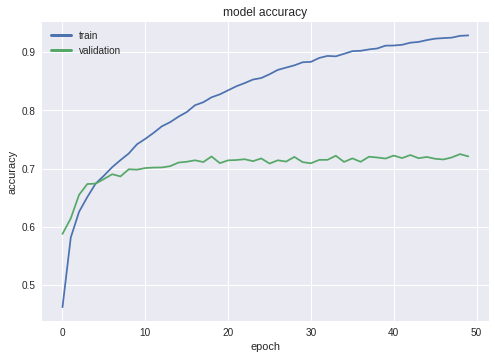

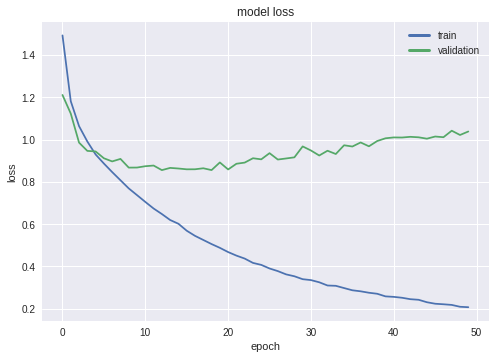

In [19]:
Show_Scores(model, DataGenerator, X_train, Y_train, X_test, Y_test)

In [20]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.996820  ;  loss = 0.032379


In [21]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

Validation: accuracy1 = 0.720800  ;  loss1 = 1.038055


In [22]:
# Save the trained weights in to .h5 format
model.save_weights("HARDAYAL_BATCH_5_ASSIGNMENT4B_Adam.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
files.download("HARDAYAL_BATCH_5_ASSIGNMENT4B_Adam.h5")